---
# <center>Convolutional Neural Network </center>
---

---
# <center> Code </center>
---

## <span style="color:#CCA6FDFF;;"> Library </span>

In [1]:
import numpy as np
import pandas as pd

import cv2
import os
from sklearn.model_selection import train_test_split
from keras.constraints import max_norm
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import SGD
from keras.constraints import max_norm
from keras.utils import to_categorical
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


## <span style="color:#CCA6FDFF;;"> Step 0 : Data Preparation </span>

### <span style="color:#FDA6A6FF;;"> Data Loading </span>


##### This script scans through a directory containing preprocessed images (the preprocessing is the same as the galborNN method, and the preprocessing process is also performed in iris_identification_GablorNN.ipynb), loads them, resizes each image to standardize the dimensions, and stores the images along with their associated labels for later use in classification tasks (CNN).

In [102]:
preprocessed_data = 'Backend/0_Data/Preprocessed_Data'
label = []
data = []
for folder in os.listdir(preprocessed_data):  
      folder_path = os.path.join(preprocessed_data, folder)
      for image_preprocessed in os.listdir(folder_path):
        input_preprocessedimg = cv2.imread(os.path.join(folder_path,image_preprocessed))
        img = cv2.resize(input_preprocessedimg,(150,200))
        label.append(folder)
        data.append(img)

### <span style="color:#FDA6A6FF;;"> Data Normalization </span>

##### This script performs essential preprocessing steps on our image dataset to prepare it for analysis and training of CNN models.

##### **Data Normalization :**

##### The image data is normalized by dividing each pixel by 255.0. This step converts pixel values from the range 0–255 to a scale of 0–1, thereby improving the stability and performance of machine learning algorithms by normalizing the inputs.

In [103]:
# Convertir la liste 'data' et la liste 'label' en tableaux numpy
data = np.array(data)
label = np.array(label)

# Normaliser les données en les divisant par 255
data_normalized = data / 255.0

### <span style="color:#FDA6A6FF;;"> Data Splitting </span>

##### This script prepares the data for a Convolutional Neural Network (CNN) model by splitting it into training and testing sets (80% of the data is used for training (`train_data`, `train_label`), and 20% is used for testing (`test_data`, `test_label`), with a random_state set to 42 to ensure reproducibility.)

In [ ]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement (70%) et de test (30%)
train_data, test_data, train_label, test_label = train_test_split(data_normalized, label, test_size=0.2, random_state=42)

In [105]:
train_label = np.array(train_label)
test_label = np.array(test_label)
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)
num_classes = train_label.shape[1]
print('data normalized and hot encoded')
print(num_classes)

data normalized and hot encoded
65


## <span style="color:#CCA6FDFF;;"> Step 1 : Convolutionl Neural network  </span>

### <span style="color:#FDA6A6FF;;"> Model Initialization </span>

In [106]:
from keras.constraints import max_norm
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import SGD

def createCNNModel(num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(200, 150, 3), padding='same', activation='relu', kernel_constraint=max_norm(3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_constraint=max_norm(3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_constraint=max_norm(3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_constraint=max_norm(3)))
    model.add(Dropout(0.3))
    model.add(Dense(256, activation='relu', kernel_constraint=max_norm(3)))
    model.add(Dense(num_classes, activation='softmax'))

    epochs = 100
    learning_rate = 0.01
    decay = learning_rate / epochs
    sgd = SGD(learning_rate=learning_rate, momentum=0.9, decay=decay, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    print(model.summary())
    return model, epochs


In [107]:
num_classes = 65
model,epochs = createCNNModel(num_classes)
print("CNN MODEL created.")

c:\Users\bouak\anaconda3\envs\boualem\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\bouak\anaconda3\envs\boualem\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 200, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 100, 75, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 100, 75, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 50, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 50, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 25, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 512)            │    29,491,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 65)             │        16,705 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,732,993 (113.42 MB)

 Trainable params: 29,732,993 (113.42 MB)

 Non-trainable params: 0 (0.00 B)

None
CNN MODEL created.


### <span style="color:#FDA6A6FF;;"> Model Training </span>

##### This code initiates the training of the CNN model on the training dataset. It configures the training execution details, such as the number of epochs and the batch size.

In [108]:
history = model.fit(train_data, train_label, epochs=epochs, batch_size=32)


Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 462ms/step - accuracy: 0.0078 - loss: 4.1834
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 477ms/step - accuracy: 0.0119 - loss: 4.1617
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 526ms/step - accuracy: 0.0415 - loss: 4.1304
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 570ms/step - accuracy: 0.0786 - loss: 4.0904
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 574ms/step - accuracy: 0.1028 - loss: 3.9207
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 565ms/step - accuracy: 0.1863 - loss: 3.4175
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 550ms/step - accuracy: 0.5394 - loss: 1.9086
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 545ms/step - accuracy: 0.6880 - loss: 1.3319
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 565ms/step - accuracy: 0.8279 - loss: 0.6237
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 574ms/step - accuracy: 0.8680 - loss: 0.5159
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 586ms/step - accuracy: 0.9469 - loss: 0.2892
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━

### <span style="color:#FDA6A6FF;;"> Model Evaluation </span>

In [109]:
# Évaluer le modèle sur l'ensemble de test
test_loss, test_accuracy = model.evaluate(test_data, test_label)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.8009 - loss: 0.9254 
Test Loss: 0.9567247629165649
Test Accuracy: 0.807692289352417


#### <span style="color:#ebaff8;;"> Loss / Accuracy Curve + Confusion Matrix </span>

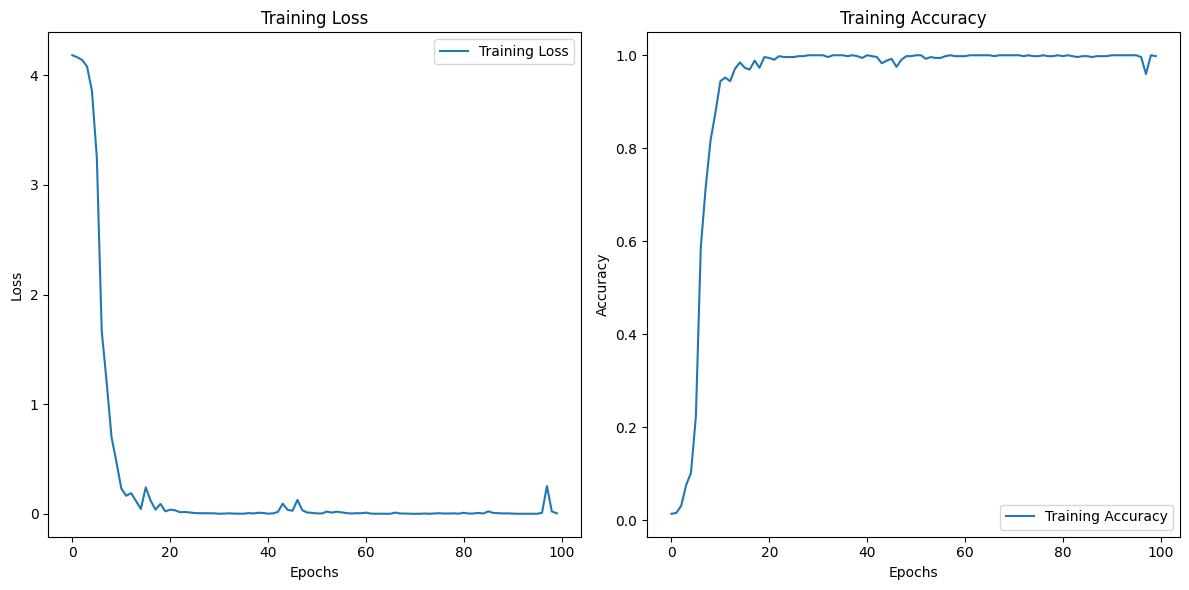

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step


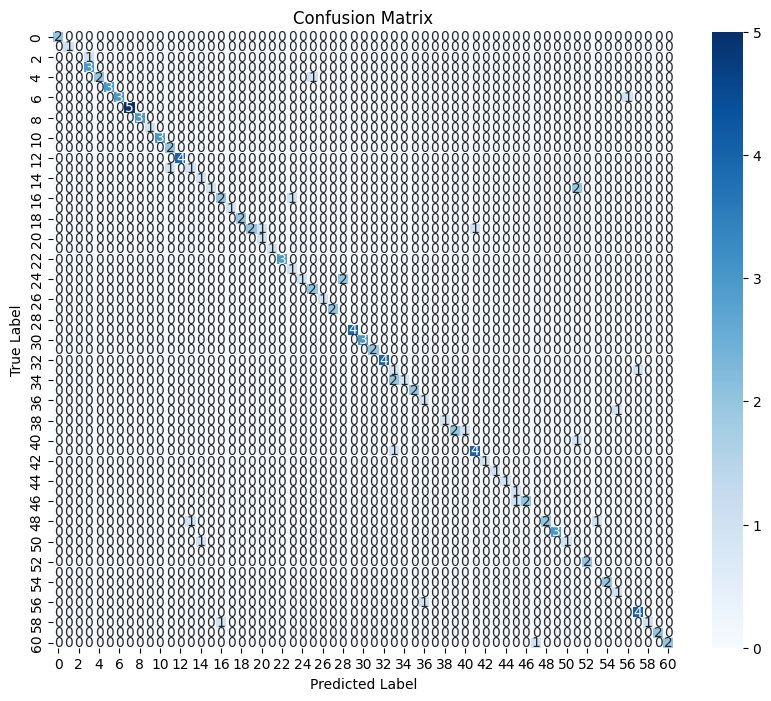

In [110]:
import matplotlib.pyplot as plt

# Visualisation des performances
plt.figure(figsize=(12, 6))

# Courbes de perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Courbes de précision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Matrice de confusion
predicted_labels = model.predict(test_data)
cm = confusion_matrix(test_label.argmax(axis=1), predicted_labels.argmax(axis=1))
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Sauvegarde du modèle en format H5
model.save('Backend\C_CNN_NN\Model\CNN_NN.h5')


## <span style="color:#CCA6FDFF;;"> Step 2 : Prediction <span>

In [111]:
import cv2
import numpy as np
from keras.models import load_model

def predict_single_image(model, image_path):
    # Charger l'image
    img = cv2.imread(image_path)
    # Redimensionner l'image à la taille attendue par le modèle
    img_resized = cv2.resize(img, (150, 200))
    # Normaliser l'image
    img_normalized = img_resized / 255.0
    # Ajouter une dimension supplémentaire pour correspondre à la forme attendue par le modèle
    img_normalized = np.expand_dims(img_normalized, axis=0)
    # Faire la prédiction avec le modèle
    prediction = model.predict(img_normalized)
    
    predicted_class = np.argmax(prediction)
    # Renvoyer la prédiction
    return predicted_class

model = load_model('Backend\C_CNN_NN\Model\CNN_NN.h5')
image_path = 'Backend/0_Data/Preprocessed_Data/064/S6064S01.jpg'
prediction = predict_single_image(model, image_path)
print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
64
